In [2]:
import sys
import os
from logging import getLogger, ERROR

notebook_dir = os.getcwd()
parent_dir = os.path.dirname(notebook_dir)
# Fix module imports
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

# Disable Hugging Face warnings
getLogger("transformers.modeling_utils").setLevel(ERROR)

In [8]:
from model.qgpt2_models import SingleHeadQGPT2Model
from transformers import GPT2Tokenizer
import time
from torch import tensor
from concrete.fhe.compilation import Configuration

model = SingleHeadQGPT2Model.from_pretrained("gpt2", n_bits=4, use_cache=False)

tokenizer = GPT2Tokenizer.from_pretrained("openai-community/gpt2")


user_input = """
Its presence is a reminder of the immense beauty and power that lies beneath the waves, stirring a sense of awe and reverence in all who witness it.
An aspiring writer scribbles furiously, weaving tales of adventure and romance,
The characters come alive on the pages, their stories intertwining and guiding the writer on a journey of self-discovery. Dragons soar through the skies, while mermaids sing enchanting melodies by the riverside, blurring the line between fantasy and reality.
"""

# input_ids = tokenizer(user_input, return_tensors="pt")

config = Configuration(show_statistics=True)

tokens = tokenizer.encode(user_input)

input_ids = tensor(tokens).unsqueeze(0)

model.compile(input_ids,configuration =config)
model.set_fhe_mode(fhe="simulate")

start = time.perf_counter()
output = model(input_ids).logits
end = time.perf_counter()

print(f"Encoding {len(tokens)} tokens, Run time: {end - start:.4f} seconds")



Statistics
--------------------------------------------------------------------------------
size_of_inputs: 3154737152
size_of_outputs: 211864064
programmable_bootstrap_count: 2721647
programmable_bootstrap_count_per_parameter: {
    BootstrapKeyParam(polynomial_size=32768, glwe_dimension=1, input_lwe_dimension=1025, level=1, base_log=22, variance=4.70197740328915e-38): 19493
    BootstrapKeyParam(polynomial_size=2048, glwe_dimension=1, input_lwe_dimension=910, level=2, base_log=15, variance=9.940977002694397e-32): 63832
    BootstrapKeyParam(polynomial_size=1024, glwe_dimension=1, input_lwe_dimension=938, level=10, base_log=2, variance=2.490281638068318e-15): 6464
    BootstrapKeyParam(polynomial_size=4096, glwe_dimension=1, input_lwe_dimension=769, level=2, base_log=15, variance=4.70197740328915e-38): 2611456
    BootstrapKeyParam(polynomial_size=65536, glwe_dimension=1, input_lwe_dimension=938, level=2, base_log=14, variance=4.70197740328915e-38): 10201
    BootstrapKeyParam(polyno

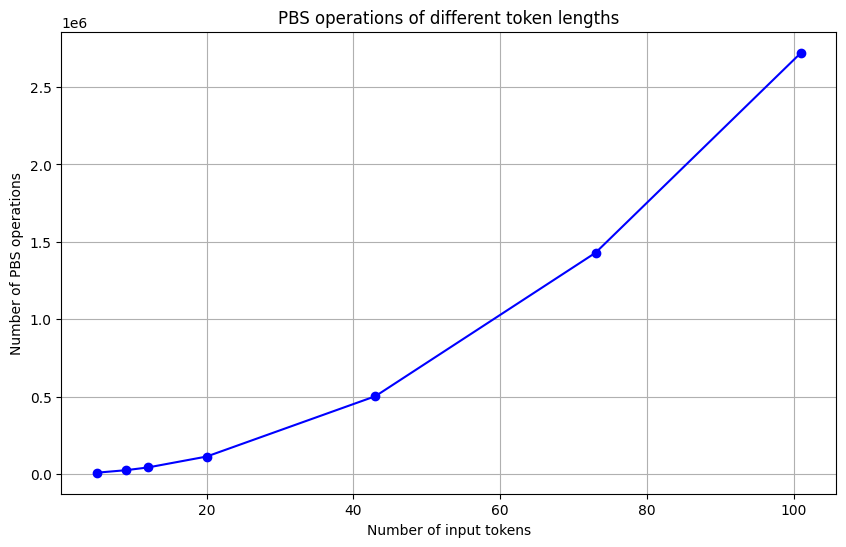

In [11]:
import matplotlib.pyplot as plt

# Data from the LaTeX table
x_values = [5, 9, 12, 20, 43, 73, 101]
y_values = [8495, 24759, 42480, 112880, 502799, 1429559, 2721647]

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, marker='o', linestyle='-', color='b')

# Adding title and labels
plt.title('PBS operations of different token lengths')
plt.xlabel('Number of input tokens')
plt.ylabel('Number of PBS operations')

# Show the plot
plt.grid(True)
plt.show()


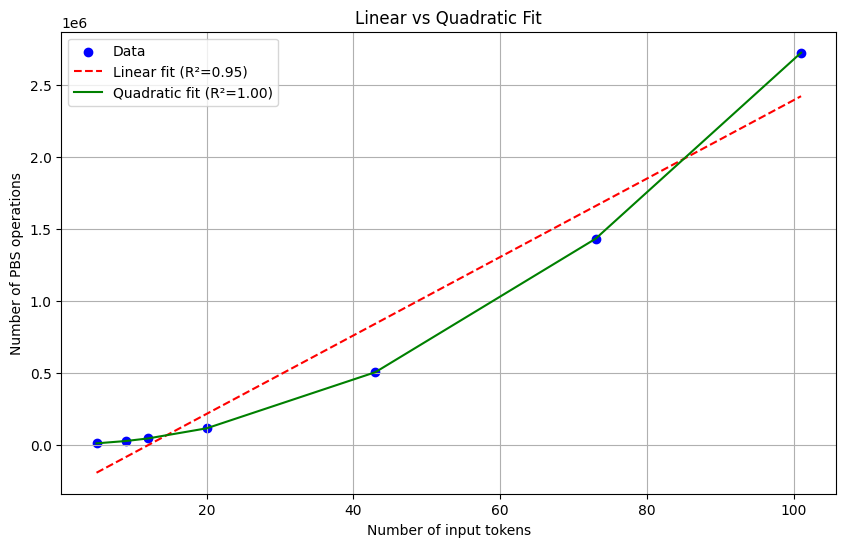

R² value for linear model: 0.95
R² value for quadratic model: 1.00


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# Data from the LaTeX table
x_values = np.array([5, 9, 12, 20, 43, 73, 101]).reshape(-1, 1)
y_values = np.array([8495, 24759, 42480, 112880, 502799, 1429559, 2721647])

# Linear model
linear_model = LinearRegression()
linear_model.fit(x_values, y_values)
y_pred_linear = linear_model.predict(x_values)
r2_linear = r2_score(y_values, y_pred_linear)

# Quadratic model
quadratic_features = PolynomialFeatures(degree=2)
x_quad = quadratic_features.fit_transform(x_values)
quadratic_model = LinearRegression()
quadratic_model.fit(x_quad, y_values)
y_pred_quad = quadratic_model.predict(x_quad)
r2_quad = r2_score(y_values, y_pred_quad)

# Plotting the data and the models
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, color='blue', label='Data')
plt.plot(x_values, y_pred_linear, color='red', linestyle='--', label=f'Linear fit (R²={r2_linear:.2f})')
plt.plot(x_values, y_pred_quad, color='green', linestyle='-', label=f'Quadratic fit (R²={r2_quad:.2f})')

# Adding title and labels
plt.title('Linear vs Quadratic Fit')
plt.xlabel('Number of input tokens')
plt.ylabel('Number of PBS operations')
plt.legend()
plt.grid(True)
plt.show()

# Printing R² values
print(f"R² value for linear model: {r2_linear:.2f}")
print(f"R² value for quadratic model: {r2_quad:.2f}")
